#### Name: Vaishnavee Thote

# Wisconsin Breast Cancer Dataset

### Importing all the libraries 

In [269]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, RocCurveDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, Ridge, Lasso
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

### Loading the Dataset

In [174]:
data = pd.read_csv('Breast Cancer.csv')

### Displaying basic information about the dataset

In [175]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sample code number           683 non-null    int64
 1   Clump Thickness              683 non-null    int64
 2   Uniformity of Cell Size      683 non-null    int64
 3   Uniformity of Cell Shape     683 non-null    int64
 4   Marginal Adhesion            683 non-null    int64
 5   Single Epithelial Cell Size  683 non-null    int64
 6   Bare Nuclei                  683 non-null    int64
 7   Bland Chromatin              683 non-null    int64
 8   Normal Nucleoli              683 non-null    int64
 9   Mitoses                      683 non-null    int64
 10  Class                        683 non-null    int64
dtypes: int64(11)
memory usage: 58.8 KB
None
       Sample code number  Clump Thickness  Uniformity of Cell Size  \
count        6.830000e+02       683.000000         

### Distribution of Variables

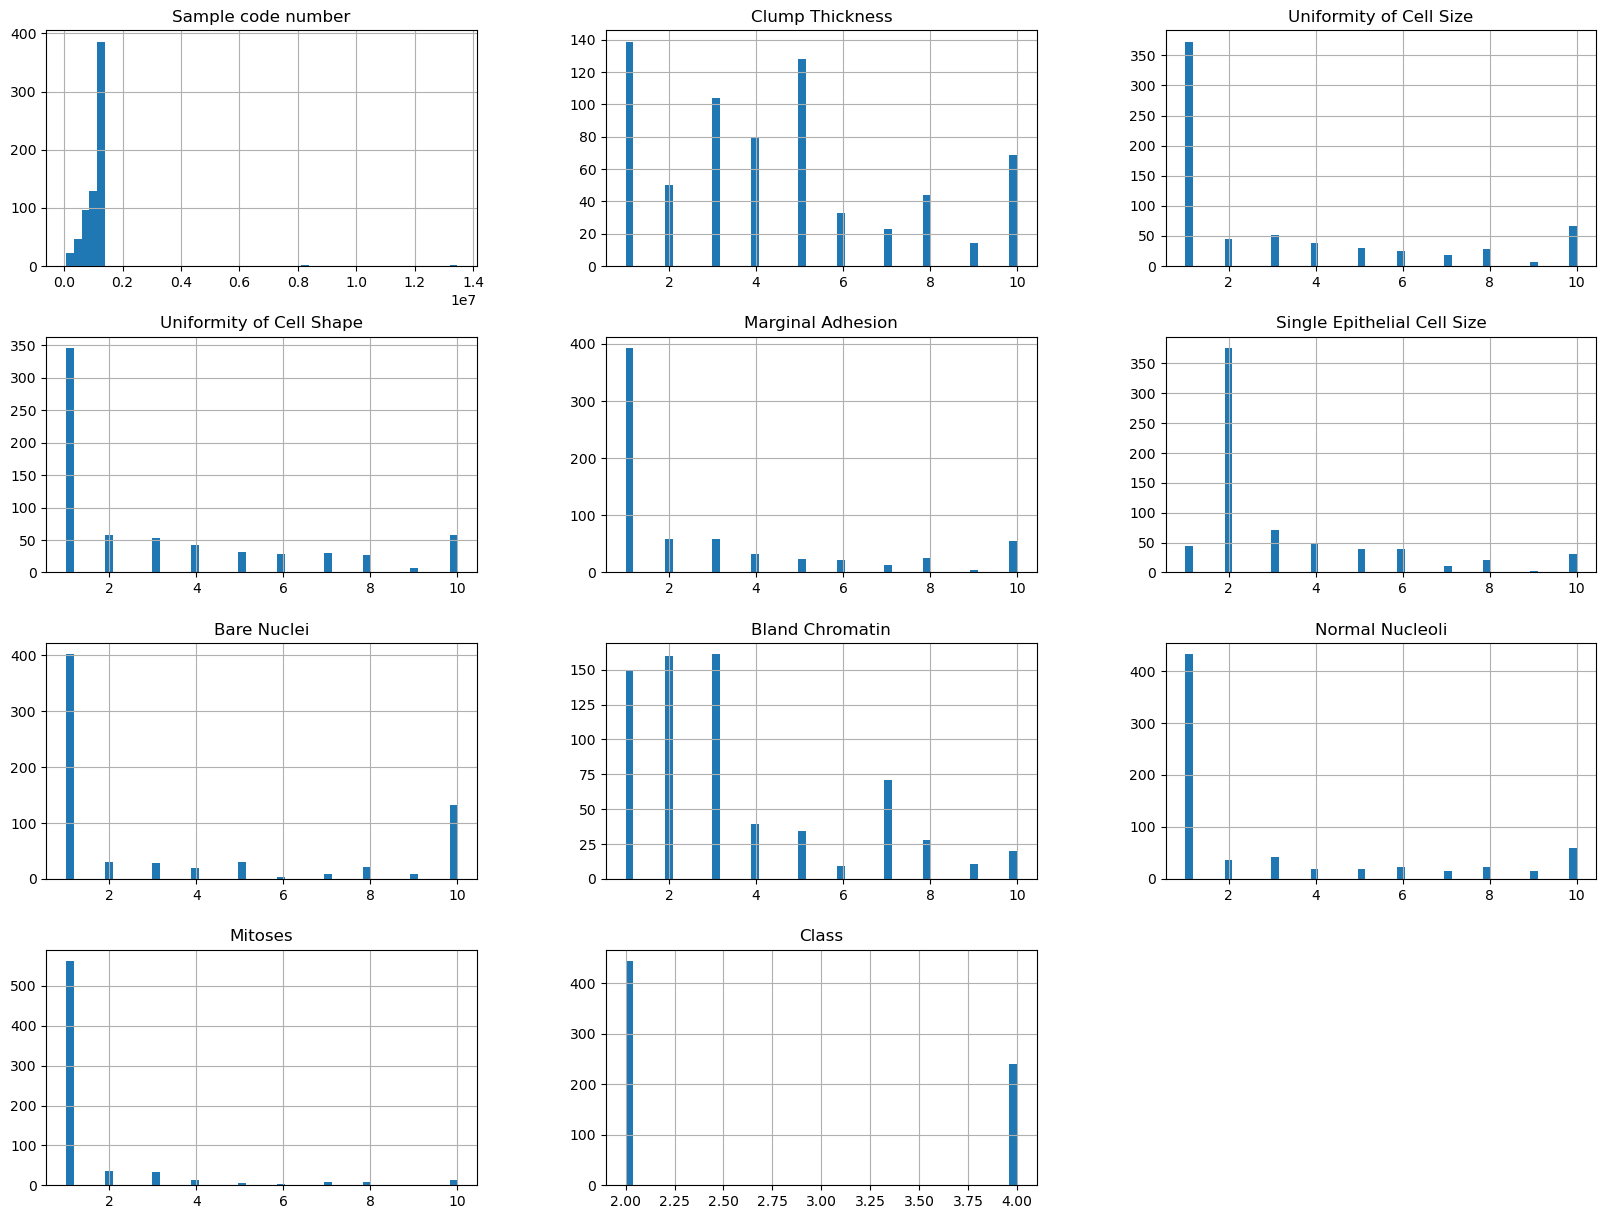

In [176]:
# Plotting data
data.hist(bins=50, figsize = (20,15))
plt.show()

After visualising the dustribution of variables, we can imply that **"Class"** is the target variable. Class has two different encoding, **2 and 4.  (e.g., 2 for benign and 4 for malignant).**

### Data Exploration - Correlation

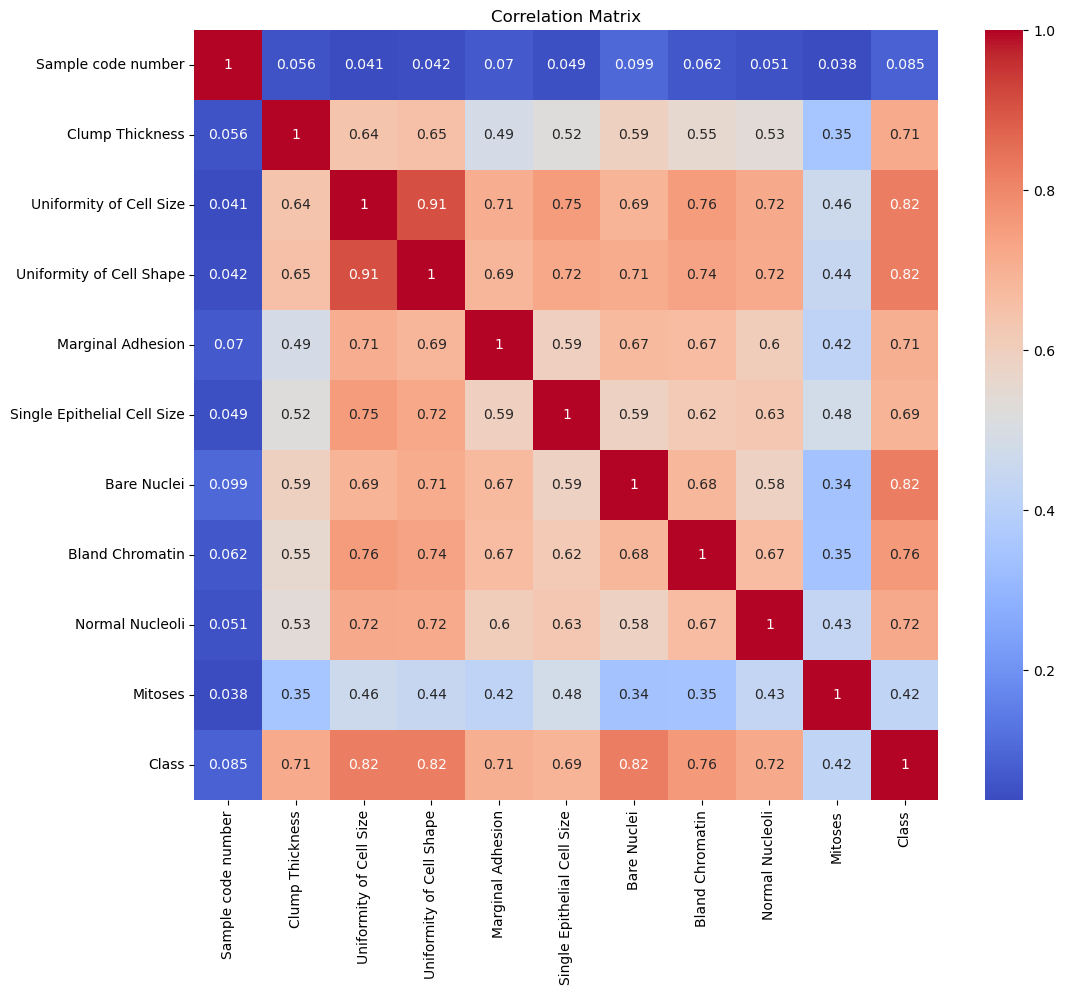

In [177]:
# Check for correlations
correlation_matrix = data.corr().abs()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

* We can see high correlations among two features (correlation coefficient > 0.9) which can introduce multicollinearity.
> Between **Uniformity of Cell Size** and **Uniformity of Cell Shape of 0.91**

#### Mitigation

In [178]:
# Step 1: Perform Feature Engineering
data['Combined_Uniformity'] = (data['Uniformity of Cell Size'] + data['Uniformity of Cell Shape']) / 2

# Drop the original features after feature engineering
data = data.drop(['Uniformity of Cell Size', 'Uniformity of Cell Shape'], axis=1)

## PRE-PROCESSING

### 1. Data Cleaning

- *Handling Missing Values:* Techniques include removing rows/columns with missing values, imputing missing values with mean/median/mode, or using algorithms that can handle missing values.
    
- *Removing Duplicates:* Identifying and removing duplicate rows to ensure the dataset is clean.
    
- *Correcting Errors:* Fixing data entry errors, such as misspellings or incorrect values.

#### Missing Values

In [179]:
# Check for missing values
print(data.isnull().sum())

Sample code number             0
Clump Thickness                0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
Combined_Uniformity            0
dtype: int64


As there are no missing values (NaNs) in the dataset, we do not need to **impute** the dataset. In the method of imputing, we use the mean of the column to impute missing values. It ensures that the overall distribution of the data is minimally affected.

#### Checking the distribution of target variable

In [180]:
# Check class distribution
class_distribution = data['Class'].value_counts()

# Display class distribution
print("Class Distribution:")
print(class_distribution)

Class Distribution:
Class
2    444
4    239
Name: count, dtype: int64


The dataset is moderately imbalanced, with the benign class (class 2) having significantly more instances than the malignant class (class 4). Need to balance the data using **SMOTE.**

### 2. Dropping the Target Variable and Identifier

In [181]:
# Drop 'Sample code number' as it is an identifier
data = data.drop(columns=['Sample code number'])

# Split the data into features and target variable
X = data.drop(columns=['Class'])
y = data['Class']

### 3. Standardize the Dataset

In [182]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### 4. Splitting the Dataset

In [183]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### 5. Balancing the class using SMOTE

In [184]:
# Apply SMOTE to balance the classes on the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

_______________________________________________________________________________________________________________

## ML ALGORITHMS

### 1. kNN

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits


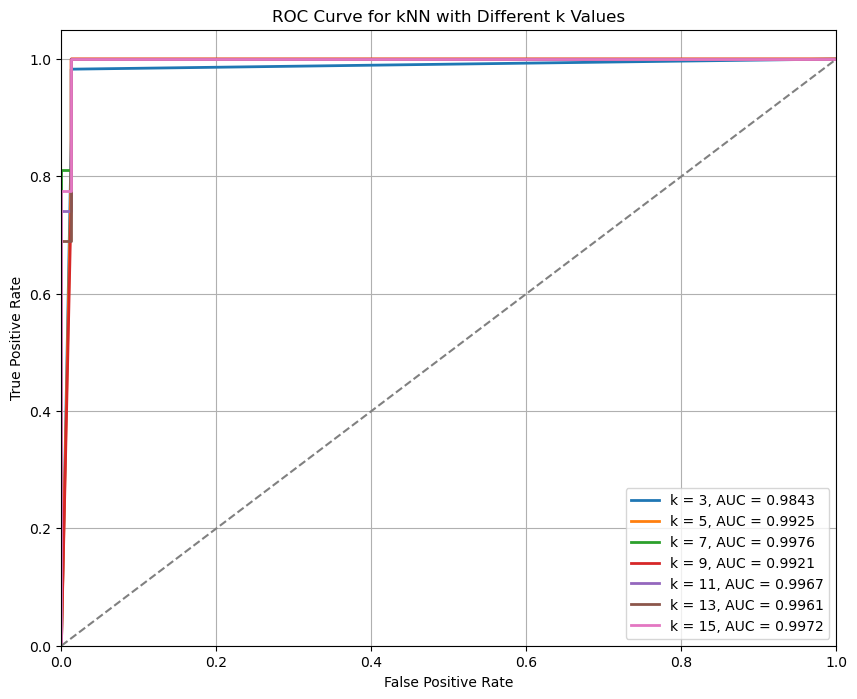

Best parameters:  {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'}
Best Cross-validation Accuracy: 0.9740
Accuracy: 0.9489
F1 Score: 0.9369
AUC-ROC Score: 0.9972


In [268]:
# Define the kNN classifier
knn = KNeighborsClassifier()

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],  # Vary the number of neighbors
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'metric': ['euclidean', 'manhattan']  # Distance metric for the tree
}

plt.figure(figsize=(10, 8))

for k in param_grid['n_neighbors']:
    # Update the parameter grid with the current k value
    param_grid_k = {'n_neighbors': [k], 'weights': param_grid['weights'], 'metric': param_grid['metric']}

    # Initialize GridSearchCV
    grid_search_k = GridSearchCV(estimator=knn, param_grid=param_grid_k, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

    # Fit GridSearchCV
    grid_search_k.fit(X_train_resampled, y_train_resampled)

    # Get the best model for the current k
    best_knn_k = grid_search_k.best_estimator_

    # Predict probabilities for the test set
    y_probs_k = best_knn_k.predict_proba(X_test)[:, 1]

    # Compute ROC curve metrics
    fpr, tpr, _ = roc_curve(y_test, y_probs_k, pos_label=4) 
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, lw=2, label='k = {}, AUC = {:.4f}'.format(k, roc_auc))

# Plot random guess line
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Set plot labels and title
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for kNN with Different k Values')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Print the best parameters and best score
print("Best parameters: ", grid_search_k.best_params_)
print("Best Cross-validation Accuracy: {:.4f}".format(grid_search_k.best_score_))

# Get the best model
best_knn = grid_search_k.best_estimator_

# Predict on the test set
y_pred = best_knn.predict(X_test)

# Calculate and print accuracy, F1-score, and AUC-ROC score
accuracy_knn = accuracy_score(y_test, y_pred)
f1_knn = f1_score(y_test, y_pred, pos_label=4)  # Use pos_label=4 for class 4 (malignant)
fpr, tpr, _ = roc_curve(y_test, y_probs_k, pos_label=4)  # Recompute ROC for best model
roc_auc_knn = auc(fpr, tpr)

print("Accuracy: {:.4f}".format(accuracy_knn))
print("F1 Score: {:.4f}".format(f1_knn))
print("AUC-ROC Score: {:.4f}".format(roc_auc_knn))

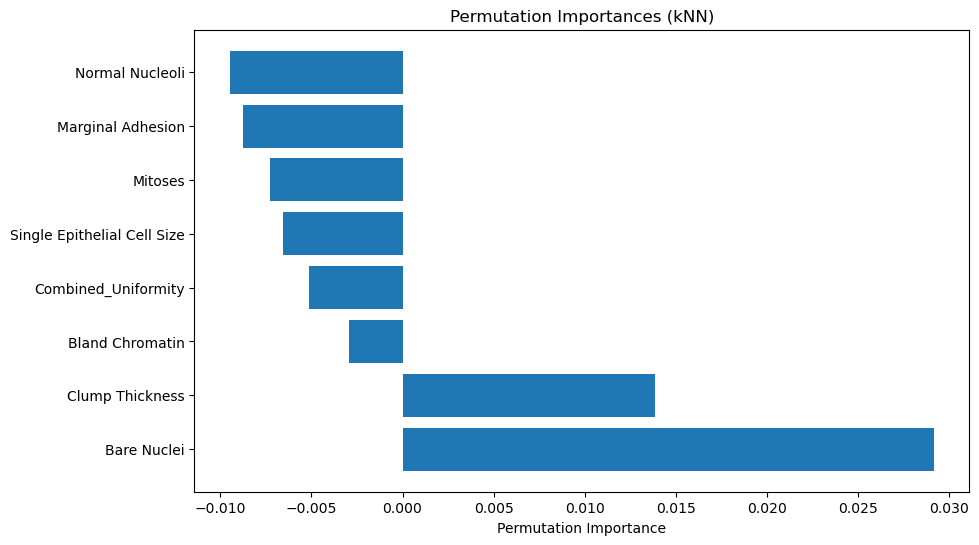

In [249]:
# Fit the best kNN model from GridSearchCV
best_knn.fit(X_train_resampled, y_train_resampled)

# Compute permutation importances
result_knn = permutation_importance(best_knn, X_test, y_test, n_repeats=10, random_state=42)
importances_knn = result_knn.importances_mean

# Get feature names
feature_names = X.columns  # Replace with your actual feature names

# Sort feature importances in descending order
sorted_idx_knn = importances_knn.argsort()[::-1]

# Plot permutation importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names[sorted_idx_knn], importances_knn[sorted_idx_knn], align='center')
plt.xlabel('Permutation Importance')
plt.title('Permutation Importances (kNN)')
plt.show()

### 2. Logistic Regression

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters:  {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best Cross-validation Accuracy: 0.9726
Accuracy: 0.9635
F1 Score: 0.9558
AUC-ROC Score: 0.9976


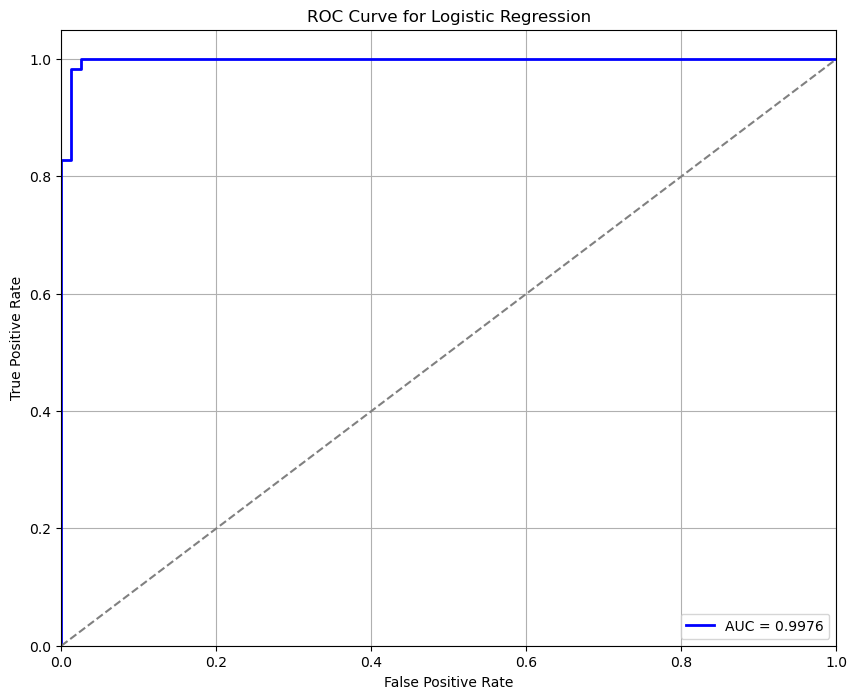

In [250]:
# Define the logistic regression model with reduced max_iter
log_reg = LogisticRegression(max_iter=10000, random_state=42)  # Reduced max_iter

# Define the refined parameter grid for GridSearchCV
param_grid = [
    {'penalty': ['l1'], 'C': [0.01, 0.1, 1], 'solver': ['liblinear', 'saga']},
    {'penalty': ['l2'], 'C': [0.01, 0.1, 1], 'solver': ['lbfgs', 'liblinear']},
]

# Initialize GridSearchCV
grid_search_log_reg = GridSearchCV(estimator=log_reg, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

# Fit GridSearchCV
grid_search_log_reg.fit(X_train_resampled, y_train_resampled)

# Get the best model
best_log_reg = grid_search_log_reg.best_estimator_

# Predict on the test set
y_pred = best_log_reg.predict(X_test)
y_probs = best_log_reg.predict_proba(X_test)[:, 1]

# Compute accuracy, F1-score, and AUC-ROC score
accuracy_log_reg = accuracy_score(y_test, y_pred)
f1_log_reg = f1_score(y_test, y_pred, pos_label=4)
roc_auc_log_reg = roc_auc_score(y_test, y_probs)

print("Best parameters: ", grid_search_log_reg.best_params_)
print("Best Cross-validation Accuracy: {:.4f}".format(grid_search_log_reg.best_score_))
print("Accuracy: {:.4f}".format(accuracy_log_reg))
print("F1 Score: {:.4f}".format(f1_log_reg))
print("AUC-ROC Score: {:.4f}".format(roc_auc_log_reg))

# Compute ROC curve metrics
fpr, tpr, _ = roc_curve(y_test, y_probs, pos_label=4)

# Plot ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='blue', lw=2, label='AUC = {:.4f}'.format(roc_auc_log_reg))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

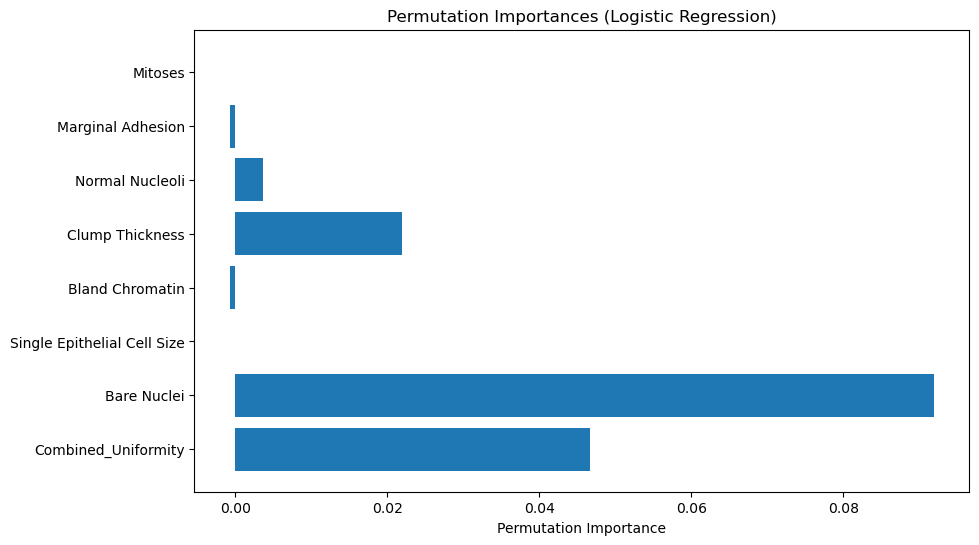

In [251]:
# Compute permutation importances
result = permutation_importance(best_log_reg, X_test, y_test, n_repeats=10, random_state=42)
importances = result.importances_mean

# Get feature names
feature_names = X.columns

# Sort feature importances in descending order
sorted_idx_ = importances.argsort()[::-1]

# Plot permutation importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names[sorted_idx], importances[sorted_idx], align='center')
plt.xlabel('Permutation Importance')
plt.title('Permutation Importances (Logistic Regression)')
plt.show()

### 3. SVM

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best parameters:  {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Best Cross-validation Accuracy: 0.9767
Accuracy: 0.9781
F1 Score: 0.9744
AUC-ROC Score: 0.9873


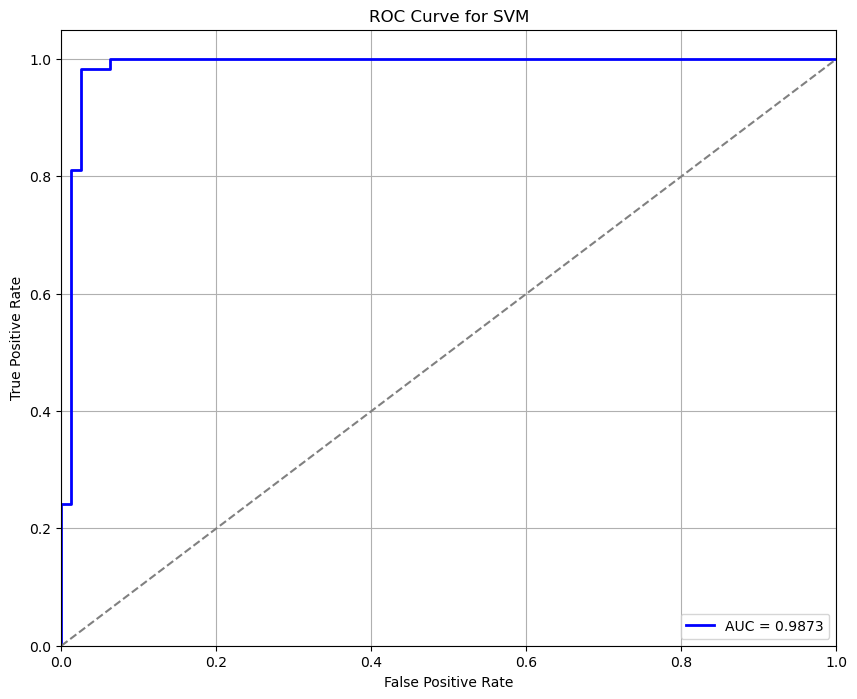

In [270]:
# Define the SVM model
svm = SVC(probability=True, random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Kernel type
    'gamma': ['scale', 'auto']  # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
}

# Initialize GridSearchCV
grid_search_svm = GridSearchCV(estimator=svm, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

# Fit GridSearchCV
grid_search_svm.fit(X_train_resampled, y_train_resampled)

# Get the best model
best_svm = grid_search_svm.best_estimator_

# Predict on the test set
y_pred = best_svm.predict(X_test)
y_probs = best_svm.predict_proba(X_test)[:, 1]

# Compute accuracy, F1-score, and AUC-ROC score
accuracy_svm = accuracy_score(y_test, y_pred)
f1_svm = f1_score(y_test, y_pred, pos_label=4)
roc_auc_svm = roc_auc_score(y_test, y_probs)

print("Best parameters: ", grid_search_svm.best_params_)
print("Best Cross-validation Accuracy: {:.4f}".format(grid_search_svm.best_score_))
print("Accuracy: {:.4f}".format(accuracy_svm))
print("F1 Score: {:.4f}".format(f1_svm))
print("AUC-ROC Score: {:.4f}".format(roc_auc_svm))


# Compute ROC curve metrics
fpr, tpr, _ = roc_curve(y_test, y_probs, pos_label=4)

# Plot ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='blue', lw=2, label='AUC = {:.4f}'.format(roc_auc_svm))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

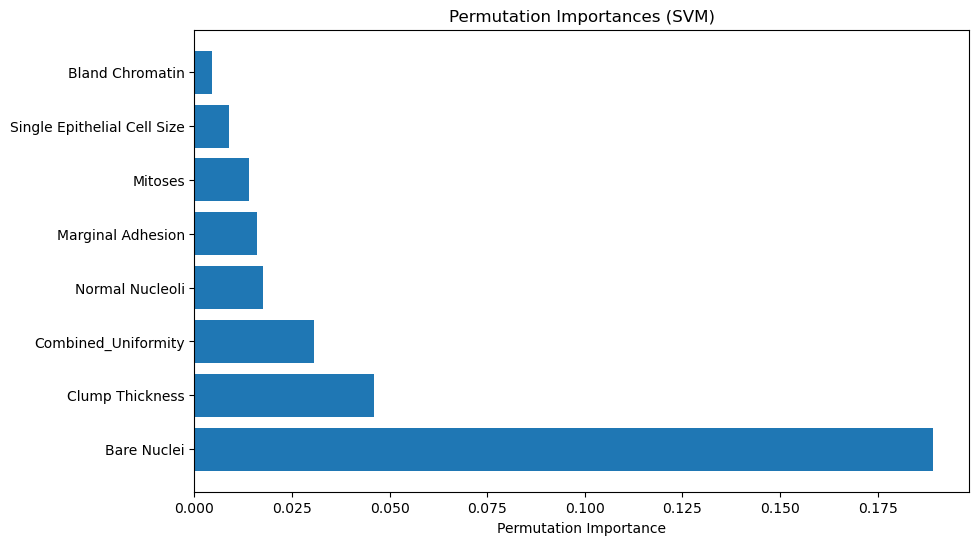

In [253]:
# Compute permutation importances
result = permutation_importance(best_svm, X_test, y_test, n_repeats=10, random_state=42)
importances = result.importances_mean

# Get feature names
feature_names = X.columns

# Sort feature importances in descending order
sorted_idx = importances.argsort()[::-1]

# Plot permutation importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names[sorted_idx], importances[sorted_idx], align='center')
plt.xlabel('Permutation Importance')
plt.title('Permutation Importances (SVM)')
plt.show()

### 4. Decision Tree

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters:  {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-validation Accuracy: 0.9630
Accuracy: 0.9416
F1 Score: 0.9286
AUC-ROC Score: 0.9356


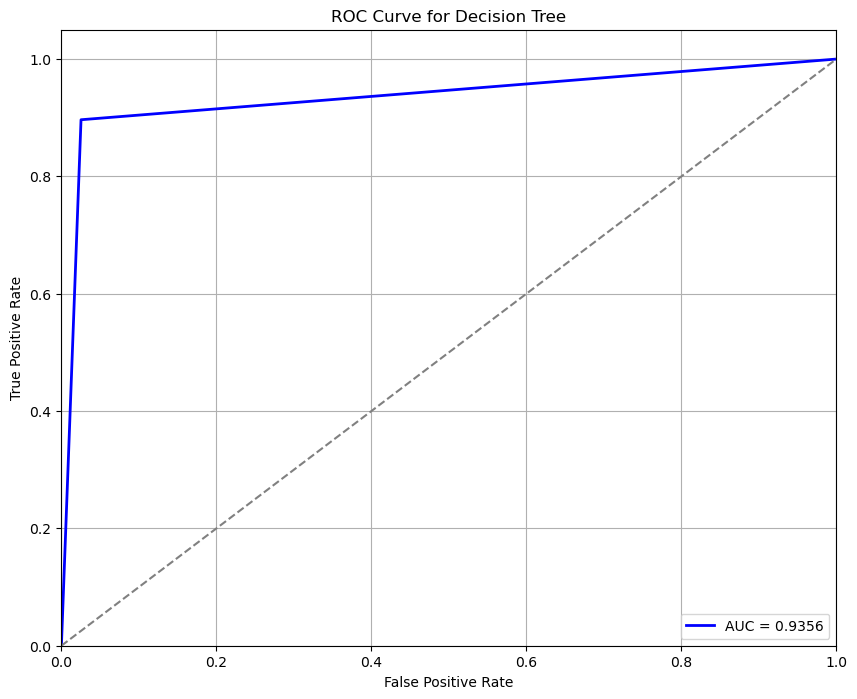

In [254]:
# Define the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],  # Splitting criteria
    'max_depth': [None, 10, 20, 30, 40, 50],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Initialize GridSearchCV
grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

# Fit GridSearchCV
grid_search_dt.fit(X_train_resampled, y_train_resampled)

# Get the best model
best_dt = grid_search_dt.best_estimator_

# Predict on the test set
y_pred = best_dt.predict(X_test)
y_probs = best_dt.predict_proba(X_test)[:, 1]

# Compute accuracy, F1-score, and AUC-ROC score
accuracy_dt = accuracy_score(y_test, y_pred)
f1_dt = f1_score(y_test, y_pred, pos_label=4)
roc_auc_dt = roc_auc_score(y_test, y_probs)

print("Best parameters: ", grid_search_dt.best_params_)
print("Best Cross-validation Accuracy: {:.4f}".format(grid_search_dt.best_score_))
print("Accuracy: {:.4f}".format(accuracy_dt))
print("F1 Score: {:.4f}".format(f1_dt))
print("AUC-ROC Score: {:.4f}".format(roc_auc_dt))

# Compute ROC curve metrics
fpr, tpr, _ = roc_curve(y_test, y_probs, pos_label=4)

# Plot ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='blue', lw=2, label='AUC = {:.4f}'.format(roc_auc_dt))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

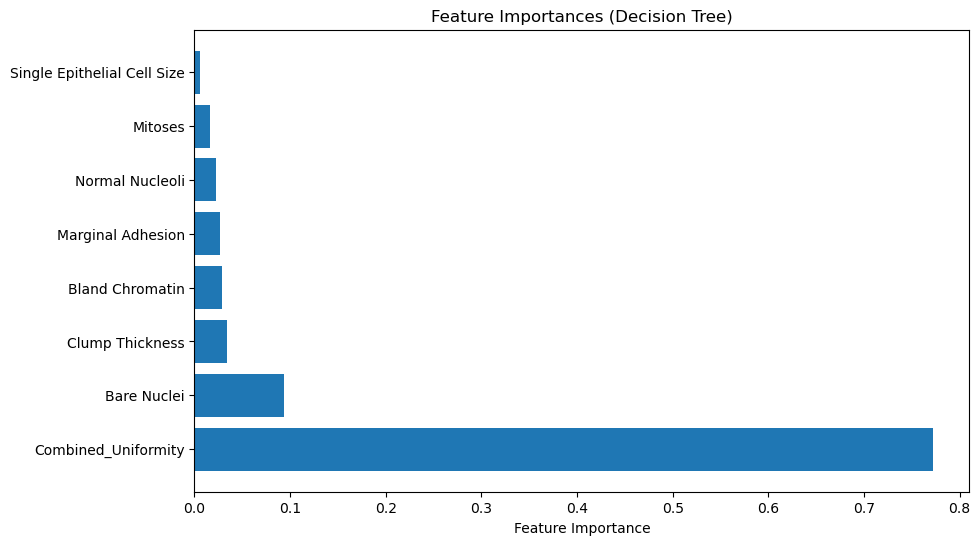

In [255]:
# Get feature importances
importances = best_dt.feature_importances_

# Get feature names
feature_names = X.columns

# Sort feature importances in descending order
sorted_idx = importances.argsort()[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names[sorted_idx], importances[sorted_idx], align='center')
plt.xlabel('Feature Importance')
plt.title('Feature Importances (Decision Tree)')
plt.show()

### 5. Random Forest

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters:  {'max_depth': None, 'n_estimators': 100}
Best Cross-validation Accuracy: 0.9753
Accuracy: 0.9854
F1 Score: 0.9828
AUC-ROC Score: 0.9957


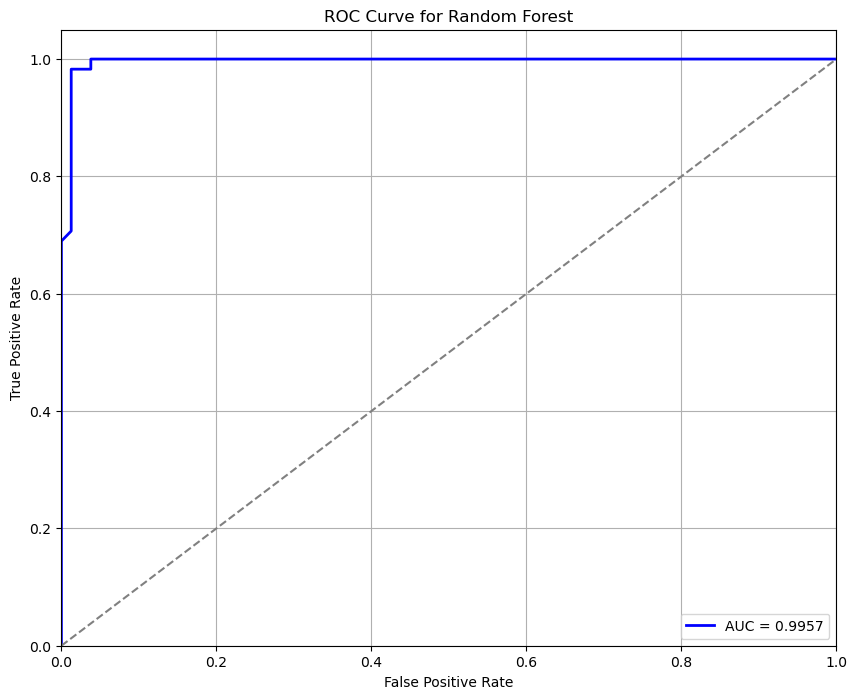

In [271]:
# Define the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30]  # Maximum depth of the tree
}

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

# Fit GridSearchCV
grid_search_rf.fit(X_train_resampled, y_train_resampled)

# Get the best model
best_rf = grid_search_rf.best_estimator_

# Predict on the test set
y_pred = best_rf.predict(X_test)
y_probs = best_rf.predict_proba(X_test)[:, 1]

# Compute accuracy, F1-score, and AUC-ROC score
accuracy_rf = accuracy_score(y_test, y_pred)
f1_rf = f1_score(y_test, y_pred, pos_label=4)
roc_auc_rf = roc_auc_score(y_test, y_probs)

print("Best parameters: ", grid_search_rf.best_params_)
print("Best Cross-validation Accuracy: {:.4f}".format(grid_search_rf.best_score_))
print("Accuracy: {:.4f}".format(accuracy_rf))
print("F1 Score: {:.4f}".format(f1_rf))
print("AUC-ROC Score: {:.4f}".format(roc_auc_rf))

# Compute ROC curve metrics
fpr, tpr, _ = roc_curve(y_test, y_probs, pos_label=4)

# Plot ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='blue', lw=2, label='AUC = {:.4f}'.format(roc_auc_rf))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

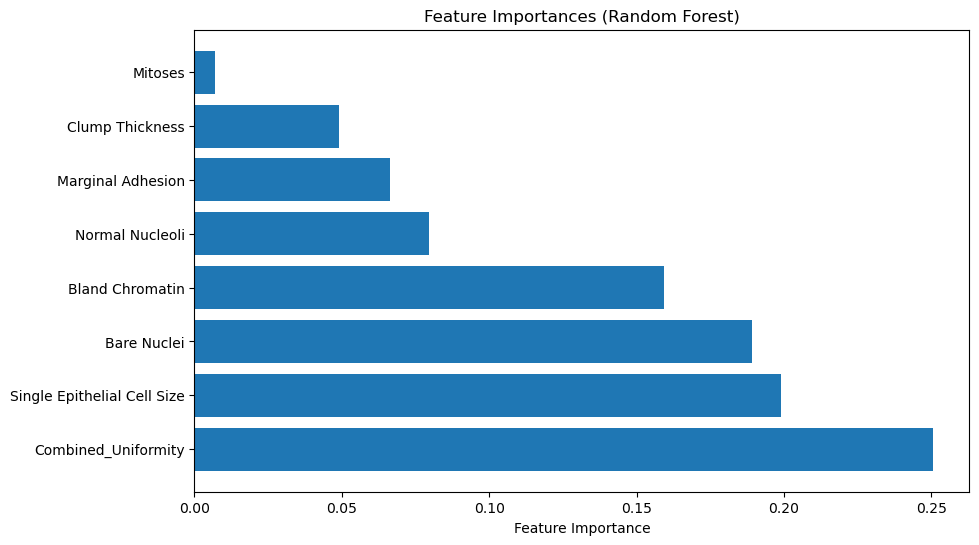

In [257]:
# Get feature importances
importances = best_rf.feature_importances_

# Get feature names
feature_names = X.columns

# Sort feature importances in descending order
sorted_idx = importances.argsort()[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names[sorted_idx], importances[sorted_idx], align='center')
plt.xlabel('Feature Importance')
plt.title('Feature Importances (Random Forest)')
plt.show()

### 6. AdaBoost

Fitting 5 folds for each of 15 candidates, totalling 75 fits


/Users/vaishnaveethote/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/vaishnaveethote/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/vaishnaveethote/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/vaishnaveethote/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use t

Best parameters:  {'learning_rate': 0.1, 'n_estimators': 100}
Best Cross-validation Accuracy: 0.9767
Accuracy: 0.9197
F1 Score: 0.8991
AUC-ROC Score: 0.9954


/Users/vaishnaveethote/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


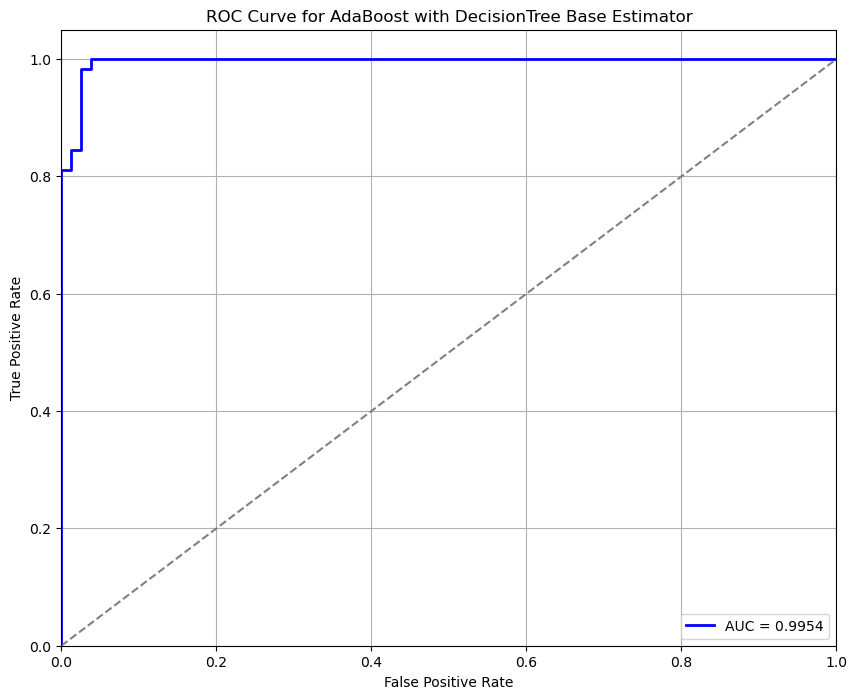

In [272]:
# Define base estimator
base_estimator = DecisionTreeClassifier(random_state=42)

# Define AdaBoost classifier (without specifying base_estimator here)
adaboost = AdaBoostClassifier(random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators' : [50, 100, 200],
    'learning_rate' : [0.001, 0.01, 0.1, 1, 10]
}

# Initialize GridSearchCV
grid_search_adaboost = GridSearchCV(estimator=adaboost, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

# Fit GridSearchCV
grid_search_adaboost.fit(X_train_resampled, y_train_resampled)

# Get the best model
best_adaboost = grid_search_adaboost.best_estimator_

# Predict on the test set
y_pred = best_adaboost.predict(X_test)
y_probs = best_adaboost.predict_proba(X_test)[:, 1]

# Compute accuracy, F1-score, and AUC-ROC score
accuracy_adaboost = accuracy_score(y_test, y_pred)
f1_adaboost = f1_score(y_test, y_pred, pos_label=4)
roc_auc_adaboost = roc_auc_score(y_test, y_probs)

print("Best parameters: ", grid_search_adaboost.best_params_)
print("Best Cross-validation Accuracy: {:.4f}".format(grid_search_adaboost.best_score_))
print("Accuracy: {:.4f}".format(accuracy_adaboost))
print("F1 Score: {:.4f}".format(f1_adaboost))
print("AUC-ROC Score: {:.4f}".format(roc_auc_adaboost))

# Compute ROC curve metrics
fpr, tpr, _ = roc_curve(y_test, y_probs, pos_label=4)

# Plot ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='blue', lw=2, label='AUC = {:.4f}'.format(roc_auc_adaboost))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for AdaBoost with DecisionTree Base Estimator')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

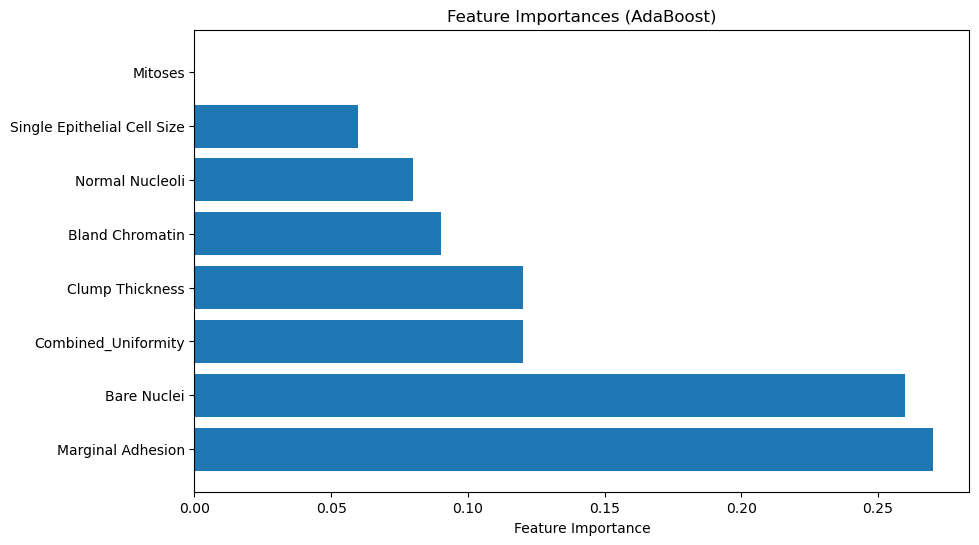

In [259]:
# Get feature importances
importances = best_adaboost.feature_importances_

# Get feature names
feature_names = X.columns

# Sort feature importances in descending order
sorted_idx = importances.argsort()[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names[sorted_idx], importances[sorted_idx], align='center')
plt.xlabel('Feature Importance')
plt.title('Feature Importances (AdaBoost)')
plt.show()

### 7. Gradient Boosting

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters:  {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100}
Best Cross-validation Accuracy: 0.9671
Accuracy: 0.9416
F1 Score: 0.9298
AUC-ROC Score: 0.9660


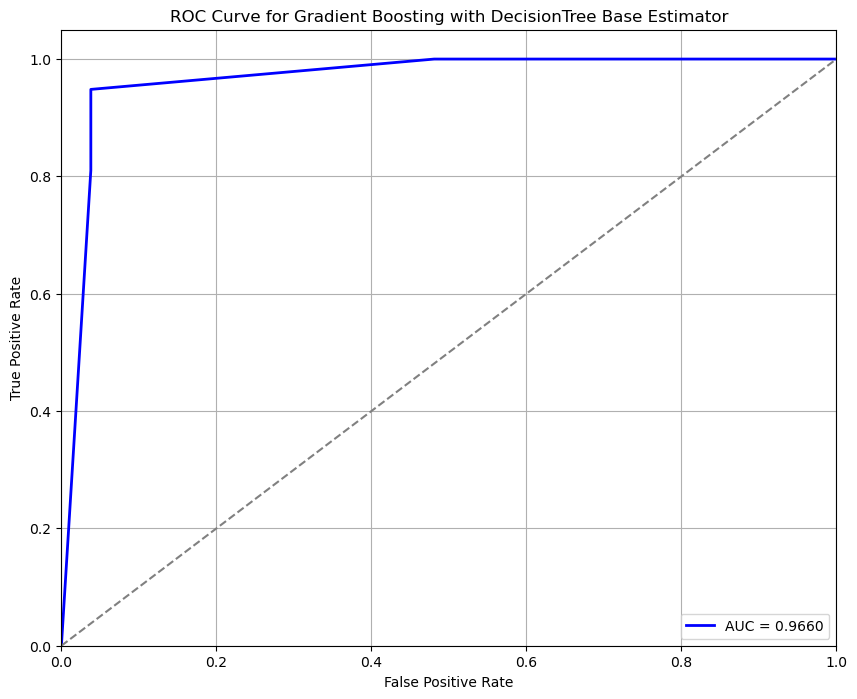

In [273]:
# Define base estimator
base_estimator = DecisionTreeClassifier(random_state=42)

# Define Gradient Boosting classifier (without specifying base_estimator here)
gradient_boosting = GradientBoostingClassifier(random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of boosting stages
    'learning_rate': [0.001, 0.1, 1, 10],  # Learning rate
    'max_depth': [10, 20, 30]
}

# Initialize GridSearchCV
grid_search_gb = GridSearchCV(estimator=gradient_boosting, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

# Fit GridSearchCV
grid_search_gb.fit(X_train_resampled, y_train_resampled)

# Get the best model
best_gb = grid_search_gb.best_estimator_

# Predict on the test set
y_pred = best_gb.predict(X_test)
y_probs = best_gb.predict_proba(X_test)[:, 1]

# Compute accuracy, F1-score, and AUC-ROC score
accuracy_gb = accuracy_score(y_test, y_pred)
f1_gb = f1_score(y_test, y_pred, pos_label=4)
roc_auc_gb = roc_auc_score(y_test, y_probs)

print("Best parameters: ", grid_search_gb.best_params_)
print("Best Cross-validation Accuracy: {:.4f}".format(grid_search_gb.best_score_))
print("Accuracy: {:.4f}".format(accuracy_gb))
print("F1 Score: {:.4f}".format(f1_gb))
print("AUC-ROC Score: {:.4f}".format(roc_auc_gb))

# Compute ROC curve metrics
fpr, tpr, _ = roc_curve(y_test, y_probs, pos_label=4)

# Plot ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='blue', lw=2, label='AUC = {:.4f}'.format(roc_auc_gb))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Gradient Boosting with DecisionTree Base Estimator')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

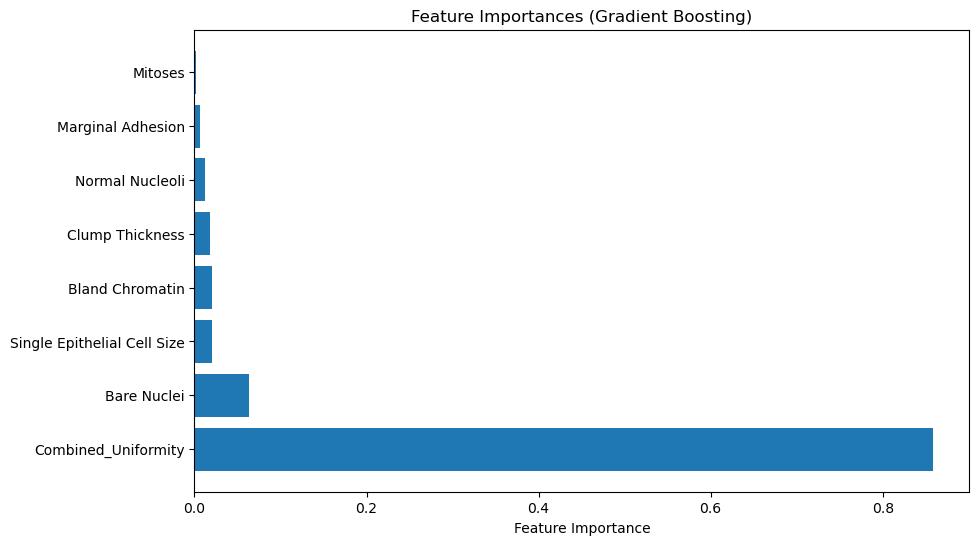

In [261]:
# Get feature importances
importances = best_gb.feature_importances_

# Get feature names
feature_names = X.columns

# Sort feature importances in descending order
sorted_idx = importances.argsort()[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names[sorted_idx], importances[sorted_idx], align='center')
plt.xlabel('Feature Importance')
plt.title('Feature Importances (Gradient Boosting)')
plt.show()

___________________________________________________________________________________________________________

## COMPARING RESULTS

In [274]:
# Define data for the table
data = [
    ["kNN", f"{f1_knn:.4f}", f"{roc_auc_knn:.4f}"],
    ["Logistic Regression", f"{f1_log_reg:.4f}", f"{roc_auc_log_reg:.4f}"],
    ["SVM", f"{f1_svm:.4f}", f"{roc_auc_svm:.4f}"],
    ["Decision Tree", f"{f1_dt:.4f}", f"{roc_auc_dt:.4f}"],
    ["Random Forest", f"{f1_rf:.4f}", f"{roc_auc_rf:.4f}"],
    ["AdaBoost", f"{f1_adaboost:.4f}", f"{roc_auc_adaboost:.4f}"],
    ["Gradient Boosting", f"{f1_gb:.4f}", f"{roc_auc_gb:.4f}"]
]

# Define headers for the table
headers = ["Classifier", "F1 Score", "AUROC"]

# Create a pandas DataFrame
df = pd.DataFrame(data, columns=headers)

# Print the DataFrame
print(df.to_string(index=False))

         Classifier F1 Score  AUROC
                kNN   0.9369 0.9972
Logistic Regression   0.9558 0.9976
                SVM   0.9744 0.9873
      Decision Tree   0.9286 0.9356
      Random Forest   0.9828 0.9957
           AdaBoost   0.8991 0.9954
  Gradient Boosting   0.9298 0.9660


### Highest F1 and AUROC Score

In [275]:
# Convert F1 Score and AUROC to numeric values
df["F1 Score"] = pd.to_numeric(df["F1 Score"])
df["AUROC"] = pd.to_numeric(df["AUROC"])

# Find the row with the highest F1 Score
max_f1_row = df.loc[df["F1 Score"].idxmax()]

# Find the row with the highest AUROC
max_auroc_row = df.loc[df["AUROC"].idxmax()]

print("Classifier with highest F1 Score:")
print(max_f1_row)

print("\nClassifier with highest AUROC:")
print(max_auroc_row)

Classifier with highest F1 Score:
Classifier    Random Forest
F1 Score             0.9828
AUROC                0.9957
Name: 4, dtype: object

Classifier with highest AUROC:
Classifier    Logistic Regression
F1 Score                   0.9558
AUROC                      0.9976
Name: 1, dtype: object


### Feature Importance for each algorithm

In [276]:
import pandas as pd
from sklearn.inspection import permutation_importance


# Compute permutation importances for kNN, Logistic Regression, and SVM
result_knn = permutation_importance(best_knn, X_test, y_test, n_repeats=10, random_state=42)
importances_knn = result_knn.importances_mean

result_log_reg = permutation_importance(best_log_reg, X_test, y_test, n_repeats=10, random_state=42)
importances_log_reg = result_log_reg.importances_mean

result_svm = permutation_importance(best_svm, X_test, y_test, n_repeats=10, random_state=42)
importances_svm = result_svm.importances_mean

# Feature importances for Decision Tree, Random Forest, AdaBoost, and Gradient Boosting
importances_dt = best_dt.feature_importances_
importances_rf = best_rf.feature_importances_
importances_adaboost = best_adaboost.feature_importances_
importances_gb = best_gb.feature_importances_

# Ensure all importances arrays have the same length as features
features = X.columns

# Create DataFrame with 'Feature' column
importances_df = pd.DataFrame({'Feature': features})

# Add importances columns for each model, handling mismatch in length
importances_df['kNN'] = [importances_knn[i] if i < len(importances_knn) else 0 for i in range(len(features))]
importances_df['Logistic Regression'] = [importances_log_reg[i] if i < len(importances_log_reg) else 0 for i in range(len(features))]
importances_df['SVM'] = [importances_svm[i] if i < len(importances_svm) else 0 for i in range(len(features))]
importances_df['Decision Tree'] = [importances_dt[i] if i < len(importances_dt) else 0 for i in range(len(features))]
importances_df['Random Forest'] = [importances_rf[i] if i < len(importances_rf) else 0 for i in range(len(features))]
importances_df['AdaBoost'] = [importances_adaboost[i] if i < len(importances_adaboost) else 0 for i in range(len(features))]
importances_df['Gradient Boost'] = [importances_gb[i] if i < len(importances_gb) else 0 for i in range(len(features))]

# Set 'Feature' column as index
importances_df.set_index('Feature', inplace=True)

# Sort by 'Gradient Boost' importance in descending order
importances_df.sort_values(by='Gradient Boost', ascending=False, inplace=True)

# Display the sorted DataFrame
print(importances_df)

                                  kNN  Logistic Regression       SVM  \
Feature                                                                
Combined_Uniformity         -0.005109             0.046715  0.030657   
Bare Nuclei                  0.029197             0.091971  0.189051   
Single Epithelial Cell Size -0.006569             0.000000  0.008759   
Bland Chromatin             -0.002920            -0.000730  0.004380   
Clump Thickness              0.013869             0.021898  0.045985   
Normal Nucleoli             -0.009489             0.003650  0.017518   
Marginal Adhesion           -0.008759            -0.000730  0.016058   
Mitoses                     -0.007299             0.000000  0.013869   

                             Decision Tree  Random Forest  AdaBoost  \
Feature                                                               
Combined_Uniformity               0.771692       0.250396      0.12   
Bare Nuclei                       0.093958       0.189044      0.2

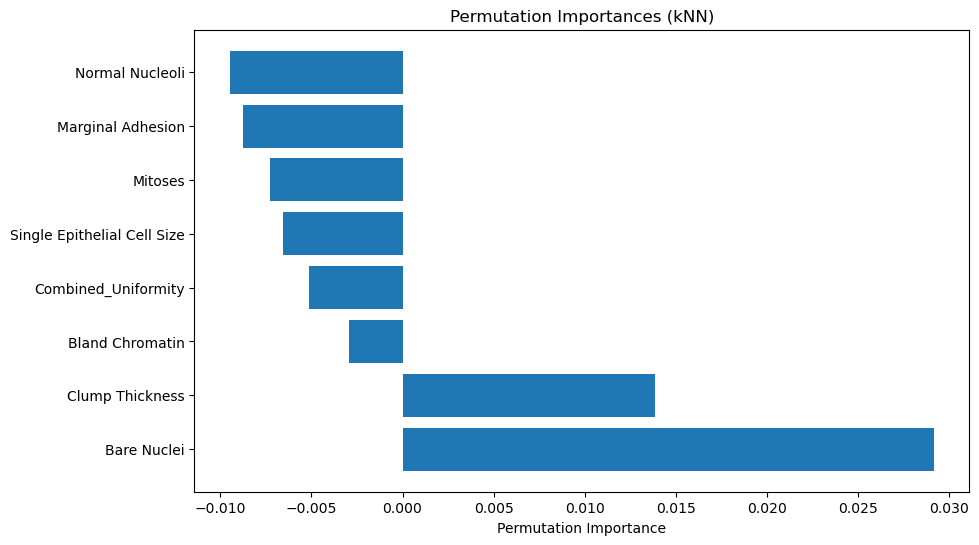

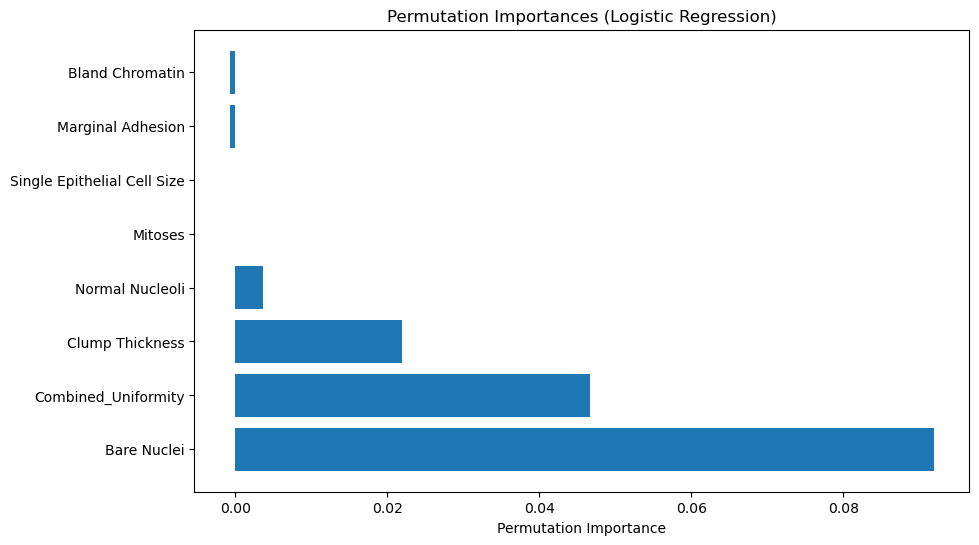

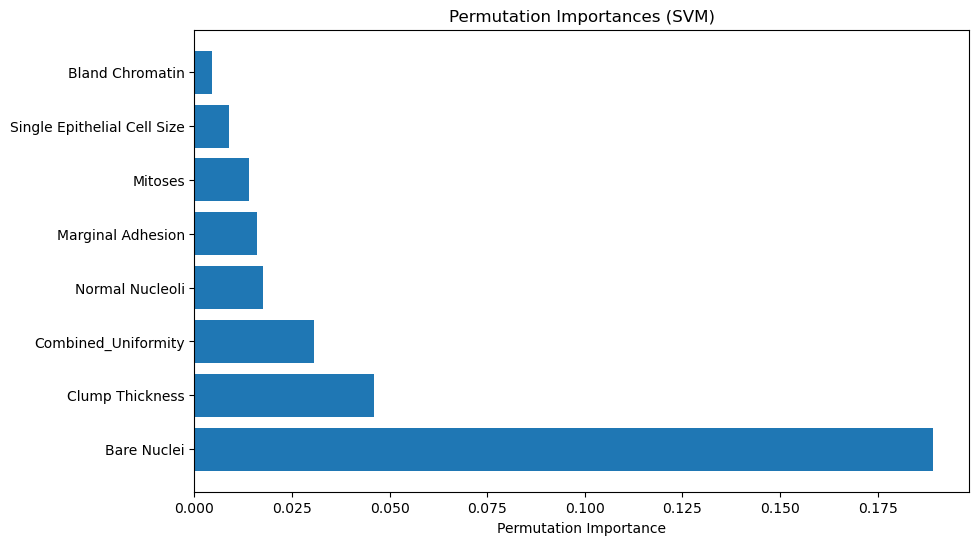

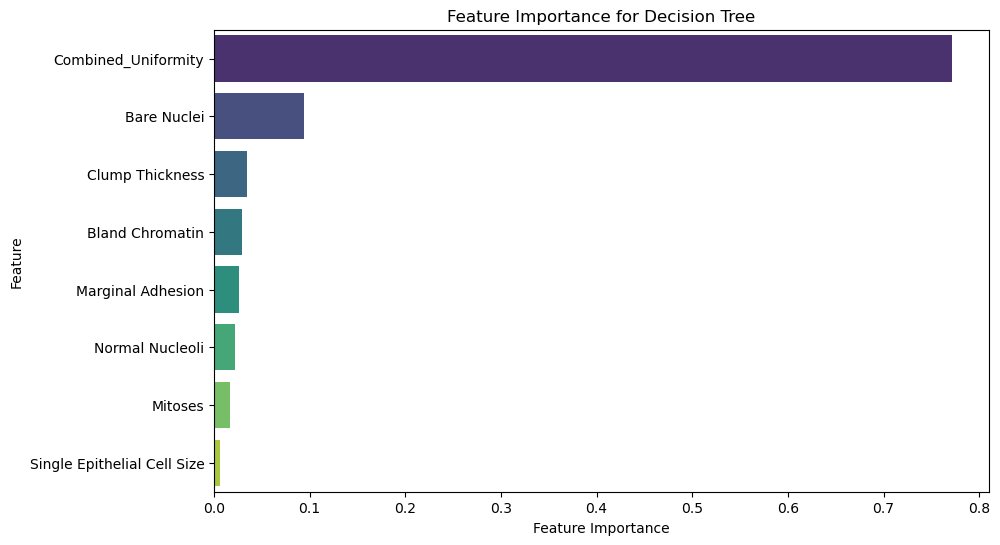

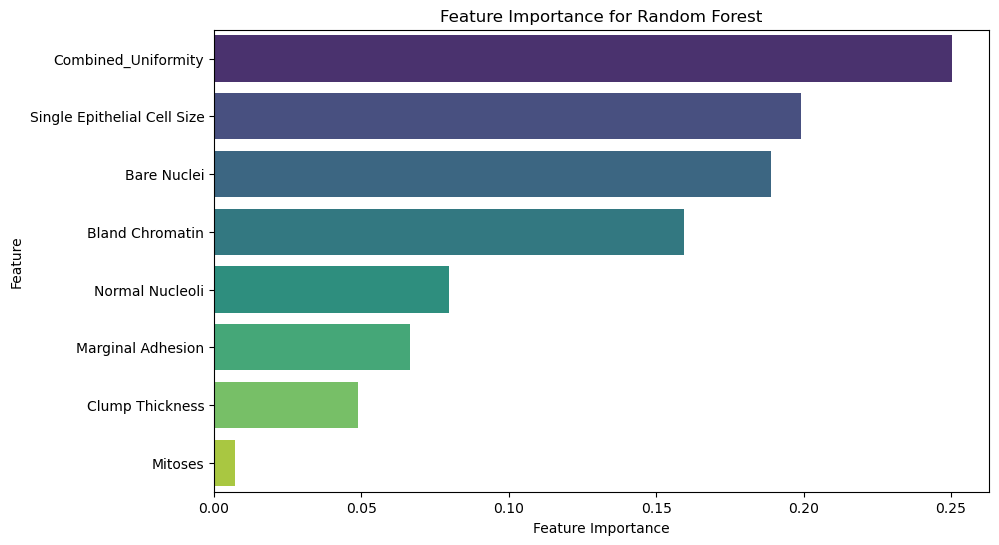

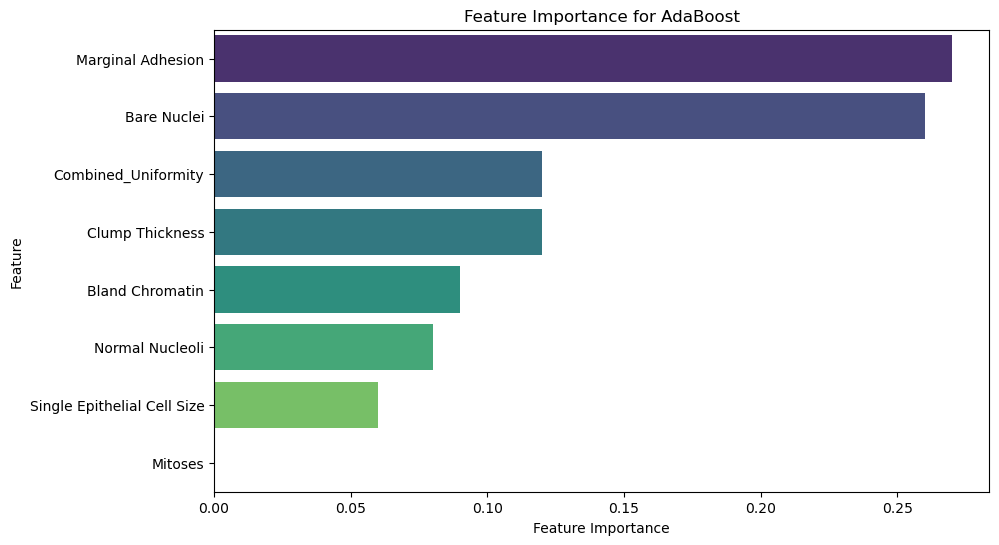

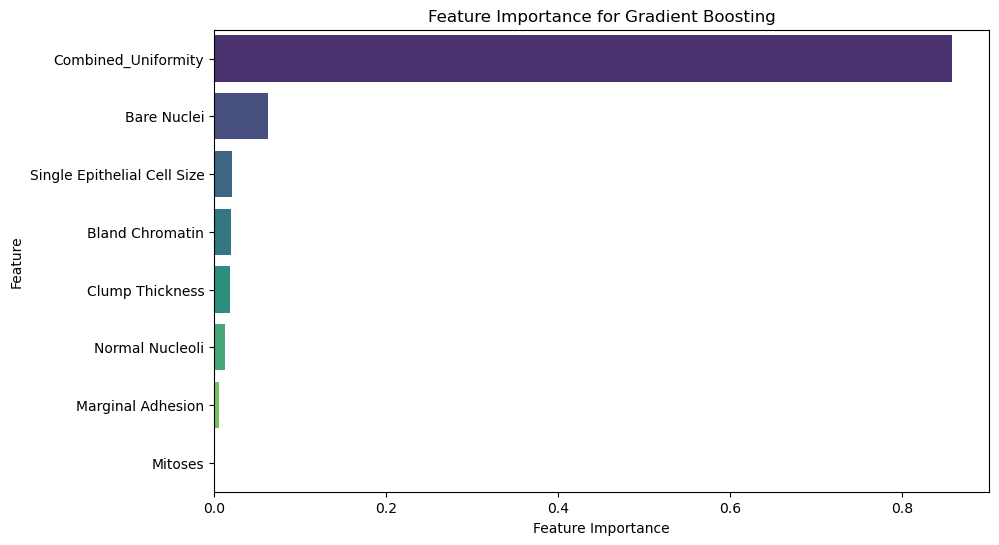

In [277]:
# Plot permutation importances for kNN
sorted_idx_knn = importances_knn.argsort()[::-1]
plt.figure(figsize=(10, 6))
plt.barh(feature_names[sorted_idx_knn], importances_knn[sorted_idx_knn], align='center')
plt.xlabel('Permutation Importance')
plt.title('Permutation Importances (kNN)')
plt.show()

# Plot permutation importances for Logistic Regression
sorted_idx_log_reg = importances_log_reg.argsort()[::-1]
plt.figure(figsize=(10, 6))
plt.barh(feature_names[sorted_idx_log_reg], importances_log_reg[sorted_idx_log_reg], align='center')
plt.xlabel('Permutation Importance')
plt.title('Permutation Importances (Logistic Regression)')
plt.show()

# Plot permutation importances for SVM
sorted_idx_svm = importances_svm.argsort()[::-1]
plt.figure(figsize=(10, 6))
plt.barh(feature_names[sorted_idx_svm], importances_svm[sorted_idx_svm], align='center')
plt.xlabel('Permutation Importance')
plt.title('Permutation Importances (SVM)')
plt.show()

# Plot feature importances for Decision Tree
sorted_idx_dt = importances_dt.argsort()[::-1]
plt.figure(figsize=(10, 6))
sns.barplot(x=importances_dt[sorted_idx_dt], y=feature_names[sorted_idx_dt], palette='viridis')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Decision Tree')
plt.show()

# Plot feature importances for Random Forest
sorted_idx_rf = importances_rf.argsort()[::-1]
plt.figure(figsize=(10, 6))
sns.barplot(x=importances_rf[sorted_idx_rf], y=feature_names[sorted_idx_rf], palette='viridis')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Random Forest')
plt.show()

# Plot feature importances for AdaBoost
sorted_idx_adaboost = importances_adaboost.argsort()[::-1]
plt.figure(figsize=(10, 6))
sns.barplot(x=importances_adaboost[sorted_idx_adaboost], y=feature_names[sorted_idx_adaboost], palette='viridis')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for AdaBoost')
plt.show()

# Plot feature importances for Gradient Boosting
sorted_idx_gb = importances_gb.argsort()[::-1]
plt.figure(figsize=(10, 6))
sns.barplot(x=importances_gb[sorted_idx_gb], y=feature_names[sorted_idx_gb], palette='viridis')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Gradient Boosting')
plt.show()

_________________________________________________________________________________________________________________

## MEDICAL LITERATURE 


Breast cancer is a significant health concern among women, necessitating early detection. Various cytological features help to diagnose the cancer.
In recent years, many studies utilizing ML algorithms surge and try to find the best classifier with the most
precise prediction to assist the diagnosis.

The Wisconsin Breast Cancer Dataset (WBCD) from the UCI database, analyzing various machine learning (ML) algorithms. The dataset has got *9 features and 1 target*. Characteristics are Clump Thickness, Uniformity of Cell Size, Uniformity of Cell Shape, Marginal Adhesion, Single Epithelial Cell Size, Bare Nuclei, Bland Chromatin, Normal Nucleoli, and Mitoses whose levels all range from 1 to 10. The target is class, *number 2 for benign, number 4 for malign.*

We used the following ML algorithms: *K-Nearest Neighbor (KNN), Logistic Regression (LR), Support Vector Machine (SVM), Decision Tree (DT), Random Forest (RF), AdaBoost,  and Gradient Boosting (GB).*
We need to find the ML algorithms which works best with the given breast cancer dataset based on performance metrices. The focus is not only on prediction accuracy but also on identifying influential factors within the dataset.


### Feature Importance

According to literature, key findings indicate that Clump Thickness and Bare Nuclei are pivotal in predicting breast cancer. 

- **Bare Nuclei**: Highly important feature in diagnosing Breast Cancer. Cancer cells often dissolve their nuclei in plasma membrane.
- **Combined Uniformity (Uniformity of cell shape and size**: Important feature in Breast Cancer detection.
- **Clump Thickness**: Important feature in Breast Cancer detection.


#### **My Observations: Top Features**


- **kNN**: Bare Nuclei, Clump Thickness

- **Logistic Regression**: Bare Nuclei, Combined Uniformity, Clump Thickness

- **SVM**: Bare Nuclei, Clump Thickness, Combined Uniformity

- **Decision Tree**: Combined Uniformity, Bare Nuclei, Clump Thickness

- **Random Forest**: Combined Uniformity, Bare Nuclei, Single Epithelial Cell Size

- **AdaBoost**: Marginal Adhesion, Bare Nuclei, Combined Uniformity

- **Gradient Boosting**: Combined Uniformity, Bare Nuclei, Clump Thickness


These top features provide a clear overview of the key features identified by each algorithm as most influential in predicting breast cancer. 
**Bare Nuclei** is consistently seen as top feature for all algorithms. 
They consistent importance of features like **Bare Nuclei, Clump Thickness, and Combined Uniformity** across multiple algorithms, underscoring their significance in the dataset.

### Algorithm Performance

The study concludes that ML algorithms, particularly LR, RF, and KNN, effectively aid in breast cancer diagnosis. 

- **kNN:** Achieved a cross-validation accuracy of 97.40%, accuracy of 94.89%, F1 score of 93.69%, and AUC-ROC score of 99.72%. Literature validation showed similar accuracy and cross-validation accuracy rates.

- **Logistic Regression:** Demonstrated a cross-validation accuracy of 97.26%, accuracy of 96.35%, F1 score of 95.58%, and AUC-ROC score of 99.76%. Literature validation also indicated high accuracy and AUC-ROC scores, validating the effectiveness of Logistic Regression in breast cancer prediction.

- **Random Forest:** Achieved a cross-validation accuracy of 97.53%, accuracy of 98.54%, F1 score of 98.28%, and AUC-ROC score of 99.57%. Literature findings showed similar accuracy and AUC-ROC scores, indicating robust predictive performance.


#### **My Observations:**

The results show that the **Logistic regression model** has the best prediction performance as it has the highest number of true or correct predictions and the lowest number of false or incorrect predictions. 

On the other hand, the **decision tree model** has the **least** prediction performance as it has the lowest number of true or correct predictions and the highest number of false or incorrect predictions.

For me, the best algorithm is Logistic Regression with the AUC-ROC score of 0.9976. Next best is kNN with AUC-ROC score of 0.9972. Followed by Random Forest with 0.9957 AUC-ROC score.

### CONCLUSION


The comparative analysis of machine learning algorithms for breast cancer prediction confirms the importance of features such as Bare Nuclei, Combined Uniformity, and Clump Thickness, as highlighted in medical literature. Algorithms like Logistic Regression, kNN and Random Forest consistently performed well across all metrics, demonstrating their suitability for predictive modeling in breast cancer diagnosis. These findings not only validate the predictive capability of machine learning models but also underscore their potential in assisting medical professionals in early detection and treatment planning for breast cancer patients.


According to my observations, keeping in consideration of feature importance and performance metrices, **Logistic Regression and kNN** are the Best ML Algorithms for the Breast Cancer Dataset. Also, the next best algorithm is **Random Forest.**



____________________________________________________________________________________________________________

### REFERENCES

- View of predictive model using Machine leaning approach for the detection of breast cancer. (n.d.). http://comien.org/index.php/comien/article/view/9/15

- Udoiwod, E. N., Ahiara, W. C., Department Of Computer Engineering, University Of Uyo, Akwa Ibom State, Umoren, M. A., Department of Computer Engineering, Michael Okpara University of Agriculture Umudike, Abia State, & Department of Electrical /Electronic Engineering, University of Uyo, Nigeria. (2024). Comparative performance evaluation of machine learning algorithms for breast cancer prediction. In International Multilingual Journal of Science and Technology (IMJST) (Vol. 9, Issue 1). http://www.imjst.org/wp-content/uploads/2024/06/IMJSTP29121026.pdf

- Li, S. (2023). A study on the crucial indicators for breast cancer detection using machine learning algorithm. Journal of Physics. Conference Series, 2646(1), 012042. https://doi.org/10.1088/1742-6596/2646/1/012042

- Basci̇Ftci̇, F., & Ünal, H. T. (2019). An empirical comparison of machine learning algorithms for predicting breast cancer. Bilge International Journal of Science and Technology Research, 3(0), 9–20. https://doi.org/10.30516/bilgesci.645067

